In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import json

f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [4]:

import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted

data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  font = str(i+1).zfill(2) + '. ' + d['font']
  for j in range(n):
    data.append([font, values[j]])
  
df = pd.DataFrame(data, columns=['Font', 'Value'])
print(df)

                   Font      Value
0       01. Baskerville  25.381997
1       01. Baskerville  26.250871
2       01. Baskerville  25.112934
3       01. Baskerville  26.131381
4       01. Baskerville  25.266306
5       01. Baskerville  25.662376
6       01. Baskerville  26.663475
7       01. Baskerville  26.144981
8       01. Baskerville  25.345254
9       01. Baskerville  25.345571
10      01. Baskerville  25.059572
11      01. Baskerville  26.088004
12      01. Baskerville  26.825578
13      01. Baskerville  25.440339
14      01. Baskerville  27.084445
15      01. Baskerville  24.589187
16      01. Baskerville  25.673210
17      01. Baskerville  25.434996
18      01. Baskerville  26.186216
19      01. Baskerville  26.403146
20      01. Baskerville  27.353472
21      01. Baskerville  25.410669
22      01. Baskerville  25.774810
23      01. Baskerville  24.865305
24      01. Baskerville  25.475866
25      01. Baskerville  25.078240
26      01. Baskerville  25.451647
27      01. Baskervi

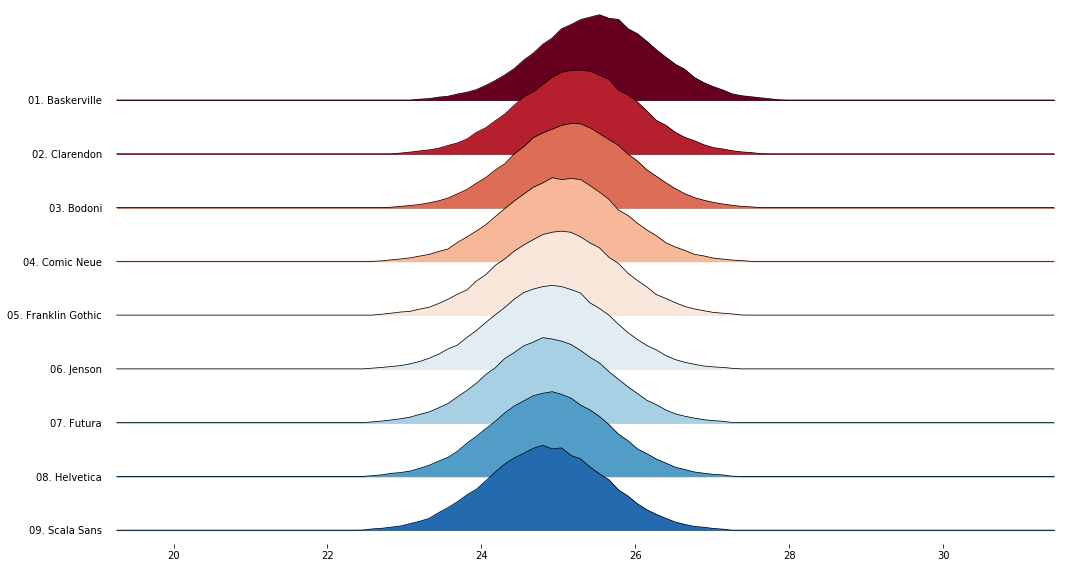

In [6]:
%matplotlib inline

from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Font", 
                          grid=False, colormap=cm.RdBu, linewidth=0.75, x_range=[19.2,31.5],
                          legend=False, overlap=1, figsize=(15,8), kind="counts", bins=100)

fig.savefig("rank_general.svg")
